**Step 1:** Import the necessary library & data

In [ ]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns    #To visualize the data
import matplotlib.pyplot as plt
import re
# import time
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the data
data = pd.read_csv('/content/drive/MyDrive/csv folder for 422/UpdatedResumeDataSet.csv')
print("The number of rows are", data.shape[0],"\nThe number of columns are", data.shape[1])
data.head() #To see the column

The number of rows are 962 
The number of columns are 2


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
# Checking the information of the dataframe(i.e the dataset)

#data.info()

In [ ]:
# Checking all the different unique values

data.nunique()

Category     25
Resume      166
dtype: int64

**Step 2:** Look & vizualise the categories

In [ ]:
#Print the categories


#data={'category':[...........],'resume':[......]}


print(data["Category"].unique())
#To see the total unique catagory
count = len(data["Category"].unique())
print(f"\nTotal unique catagory: {count}")

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

Total unique catagory: 25


In [ ]:
# See how much data in every category

print(data["Category"].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


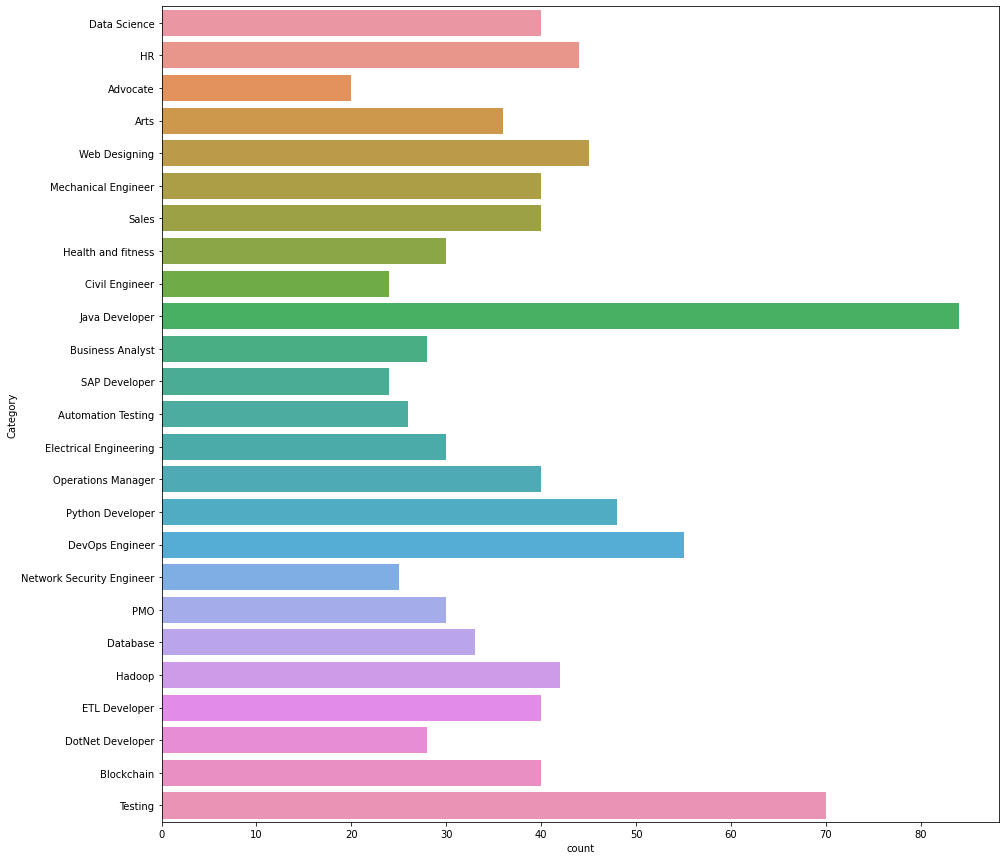

In [ ]:
#Now visualize the individual catagory

plt.figure(figsize = (15,15)) # Figure size
sns.countplot(y = "Category", data = data) #category will be on Y axis

**Step 3:** Calculate the distribution of each category & visualize it.

In [ ]:
# calculate the distribution of Categories

Category = data['Category'].value_counts().reset_index()['Category']
Labels = data['Category'].value_counts().reset_index()['index']

print(data["Category"].value_counts()*100/data.shape[0])   # data.shape[0] = total num of data

Java Developer               8.731809
Testing                      7.276507
DevOps Engineer              5.717256
Python Developer             4.989605
Web Designing                4.677755
HR                           4.573805
Hadoop                       4.365904
Blockchain                   4.158004
ETL Developer                4.158004
Operations Manager           4.158004
Data Science                 4.158004
Sales                        4.158004
Mechanical Engineer          4.158004
Arts                         3.742204
Database                     3.430353
Electrical Engineering       3.118503
Health and fitness           3.118503
PMO                          3.118503
Business Analyst             2.910603
DotNet Developer             2.910603
Automation Testing           2.702703
Network Security Engineer    2.598753
SAP Developer                2.494802
Civil Engineer               2.494802
Advocate                     2.079002
Name: Category, dtype: float64


Java Developer               8.731809
Testing                      7.276507
DevOps Engineer              5.717256
Python Developer             4.989605
Web Designing                4.677755
HR                           4.573805
Hadoop                       4.365904
Blockchain                   4.158004
ETL Developer                4.158004
Operations Manager           4.158004
Data Science                 4.158004
Sales                        4.158004
Mechanical Engineer          4.158004
Arts                         3.742204
Database                     3.430353
Electrical Engineering       3.118503
Health and fitness           3.118503
PMO                          3.118503
Business Analyst             2.910603
DotNet Developer             2.910603
Automation Testing           2.702703
Network Security Engineer    2.598753
SAP Developer                2.494802
Civil Engineer               2.494802
Advocate                     2.079002
Name: Category, dtype: float64


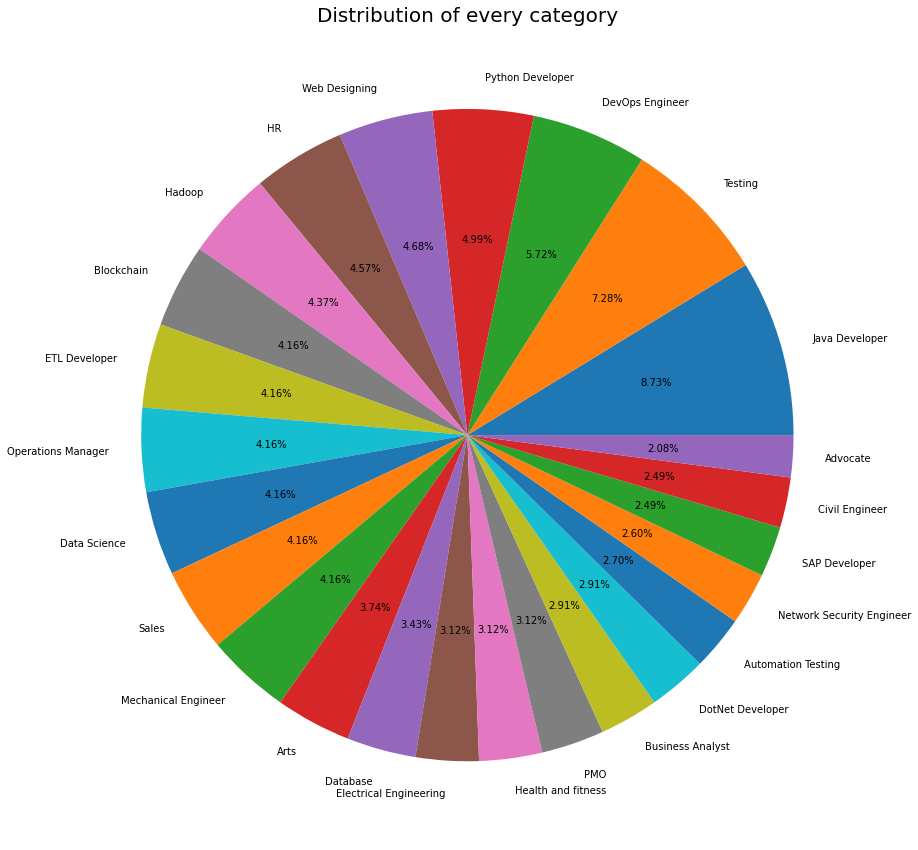

In [ ]:
#Visualize the distribution of Categories

plt.figure(figsize = (15,15))
plt.title("Distribution of every category", fontsize=20)
plt.pie(Category, labels = Labels, autopct = '%1.2f%%', shadow = False)
print(data["Category"].value_counts()*100/data.shape[0])

**Step 4:** Pre-Processing the data

In [ ]:
# Function to clean the data

def clean(data):
    data = re.sub('httpS+s*', ' ', data)       # Removing the links
    data = re.sub('RT|cc', ' ', data)           # Removing the RT and cc
    data = re.sub('#S+', ' ', data)             # Removing the hashtags
    data = re.sub('@S+', ' ', data)           # Removing the mentions
    data = data.lower()                      # Changing the test to lowercase
    data = ''.join([i if 32 < ord(i) < 128 else ' ' for i in data])    # Removing all the special characters
    data = re.sub('s+', 's', data)                                                      # Removing extra whitespaces
    data = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', data)  # Removing punctuations
    return data


cleaned_data = data['Category'].to_frame()
cleaned_data['Resume'] = data['Resume'].apply(lambda x: clean(x))       # Applying the clean function
print(cleaned_data)

         Category                                             Resume
0    Data Science  skills   programming languages  python  pandas...
1    Data Science  education details   may 2013 to may 2017 b e  ...
2    Data Science  areas of interest deep learning  control syste...
3    Data Science  skills     r     python     sap hana     table...
4    Data Science  education details    mca   ymcaust   faridabad...
..            ...                                                ...
957       Testing  computer skills      proficient in ms office  ...
958       Testing      willingnes to a ept the challenges      po...
959       Testing  personal skills     quick learner      eagerne...
960       Testing  computer skills   software knowledge ms power ...
961       Testing  skill set os windows xp 7 8 8 1 10 database my...

[962 rows x 2 columns]


**Step 5:** Encoding the Category data & Creating a Word Vector using TfidfVectorizer

In [ ]:
# Encoding the Category column using LabelEncoder

#encoder = LabelEncoder()
#cleaned_data['Category'] = encoder.fit_transform(cleaned_data['Category'])
#cleaned_data

In [ ]:
# Encoded Classes

#encoder.classes_

In [ ]:
# Creating a Word Vectorizer and transforming it

Resume = cleaned_data['Resume'].values
Category = cleaned_data['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf = True, stop_words = 'english', max_features = 1000)
word_vectorizer.fit(Resume)
WordFeatures = word_vectorizer.transform(Resume)
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


**Step 6:** Training our Machine Learning Model

In [ ]:
# Splitting the data into train, test, printing the shape of each and running KNeighborsClassifier with OneVsRest method

X_train, X_test, y_train, y_test = train_test_split(WordFeatures, Category, random_state=2, test_size = 0.2)

#print(X_train)
# print(X_test)
print(y_train)
# print(y_train.shape)

print(f'The shape of the training data {X_train.shape[0]}')
print(f'The shape of the test data {X_test.shape[0]}')


['DotNet Developer' 'Database' 'Operations Manager' 'Mechanical Engineer'
 'Data Science' 'Sales' 'Mechanical Engineer' 'Java Developer' 'Testing'
 'Business Analyst' 'Operations Manager' 'ETL Developer' 'Testing'
 'Business Analyst' 'Arts' 'Civil Engineer' 'Network Security Engineer'
 'Java Developer' 'PMO' 'Operations Manager' 'Java Developer'
 'Python Developer' 'Advocate' 'HR' 'Sales' 'Testing' 'Health and fitness'
 'Data Science' 'Data Science' 'Testing' 'Web Designing' 'Hadoop'
 'Python Developer' 'ETL Developer' 'Automation Testing' 'Blockchain'
 'Web Designing' 'Automation Testing' 'Civil Engineer' 'HR'
 'Electrical Engineering' 'Data Science' 'Blockchain' 'Web Designing'
 'Hadoop' 'Testing' 'Java Developer' 'SAP Developer' 'ETL Developer'
 'Data Science' 'Automation Testing' 'Mechanical Engineer' 'Arts'
 'Automation Testing' 'Blockchain' 'Mechanical Engineer' 'Testing'
 'Web Designing' 'Testing' 'Python Developer' 'HR' 'Mechanical Engineer'
 'Mechanical Engineer' 'Operations M

Step 7 :KNeighbors Clasifier Modeling

In [ ]:
# Predicting the values using the model built with train data and checking the appropriate metrics
# Computing the accuracy metrics and classification report
classified_data = OneVsRestClassifier(KNeighborsClassifier())
classified_data.fit(X_train, y_train)
k_pred = classified_data.predict(X_test)
print(f'Accuracy of KNeighbors Classifier on test set: {classified_data.score(X_test, y_test):.2f} out of 1.0 \n')
print(f'The classification report \n {metrics.classification_report(y_test, k_pred)}\n\n')

Accuracy of KNeighbors Classifier on test set: 0.98 out of 1.0 

The classification report 
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         3
           Civil Engineer       1.00      1.00      1.00         4
             Data Science       1.00      1.00      1.00         5
                 Database       0.78      1.00      0.88         7
          DevOps Engineer       1.00      1.00      1.00        11
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       0.83      1.00      0.91         5
                       HR       1.0

Step 7.1---Confusion matrix for KNeighbour

[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6

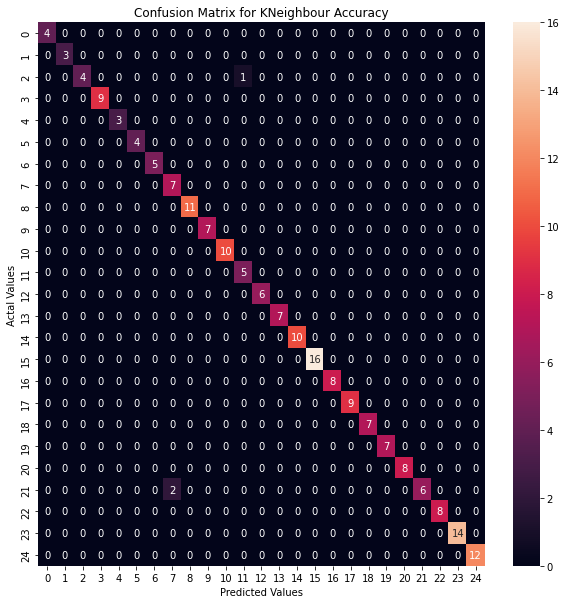

In [ ]:
cm_kn = confusion_matrix(y_test, k_pred)
print(cm_kn)
#cm_df = pd.DataFrame(data=cm_kn,index = [..], columns = [..])
#but our data is in [[...],[...],[..]] form which complicates the situation that's why indexes and columns are ignored here

cm_matrix = pd.DataFrame(data=cm_kn)
plt.figure(figsize=(10,10))
sns.heatmap(cm_matrix, annot=True)
plt.title('Confusion Matrix for KNeighbour Accuracy')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Step 8 : Support Vector Machine Classifier Modeling

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
pred_svc = svc_model.predict(X_test)
print(f'Accuracy of Support Vector Machine model is : {accuracy_score(y_test,pred_svc):.2f} out of 1.0 and {accuracy_score(y_test,pred_svc) * 100}% in terms of percentage')
print(f'The classification report \n {metrics.classification_report(y_test, pred_svc)}\n\n')



#Another way to check if previous model was correct or not........

# from sklearn.preprocessing import LabelEncoder
# Encoder = LabelEncoder()
# Train_Y = Encoder.fit_transform(y_train)
# Test_Y = Encoder.fit_transform(y_test)

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn import model_selection, svm
# SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# SVM.fit(X_train,y_train)
# # // predict labels
# predictions_SVM = SVM.predict(X_test)
# # // get the accuracy
# print("Accuracy: ",accuracy_score(predictions_SVM, y_test)*100)


Accuracy of Support Vector Machine model is : 1.00 out of 1.0 and 100.0% in terms of percentage
The classification report 
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         3
           Civil Engineer       1.00      1.00      1.00         4
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      1.00      1.00        11
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         5
    

Step 8.1---Confusion matrix for Support Vector Model

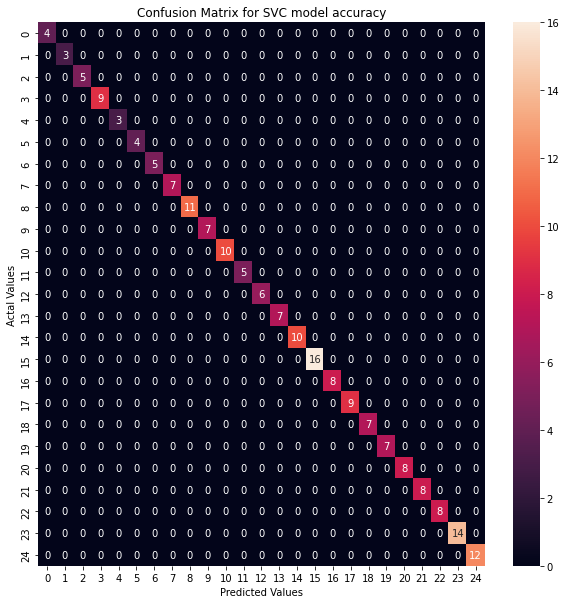

In [ ]:
cm_svc = confusion_matrix(y_test,pred_svc)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_svc)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix for SVC model accuracy')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Step 9 -- Naive bayes Classifier Modeling

In [ ]:
bayes = GaussianNB()
bayes.fit(X_train.toarray(), y_train)
bayes_pred = bayes.predict(X_test.toarray())

print(f'Accuracy of Naive Bayes model is : {accuracy_score(y_test,bayes_pred):.2f} out of 1.0 and {accuracy_score(y_test,bayes_pred) * 100}% in terms of percentage')
print(f'The classification report \n {metrics.classification_report(y_test, bayes_pred)}\n\n')

Accuracy of Naive Bayes model is : 1.00 out of 1.0 and 100.0% in terms of percentage
The classification report 
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         3
           Civil Engineer       1.00      1.00      1.00         4
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      1.00      1.00        11
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         5
               

Step 9.1---Confusion Matrix for Naive Bayes model accuracy

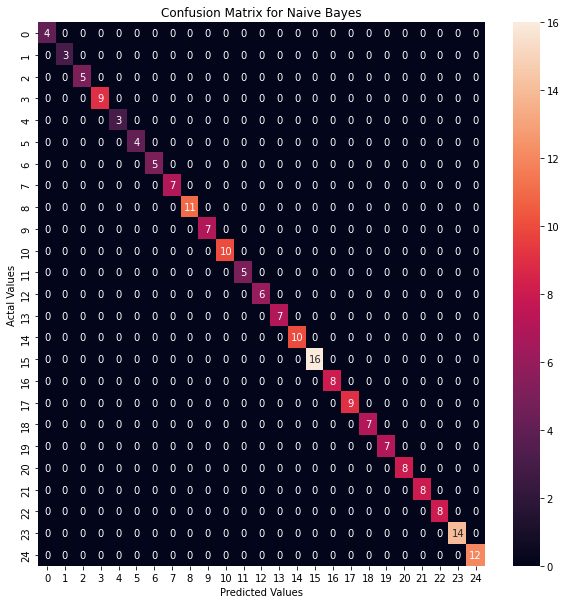

In [ ]:
cm_bayes = confusion_matrix(y_test,bayes_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_bayes)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix for Naive Bayes')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()